In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/mxmh_survey_results.csv')

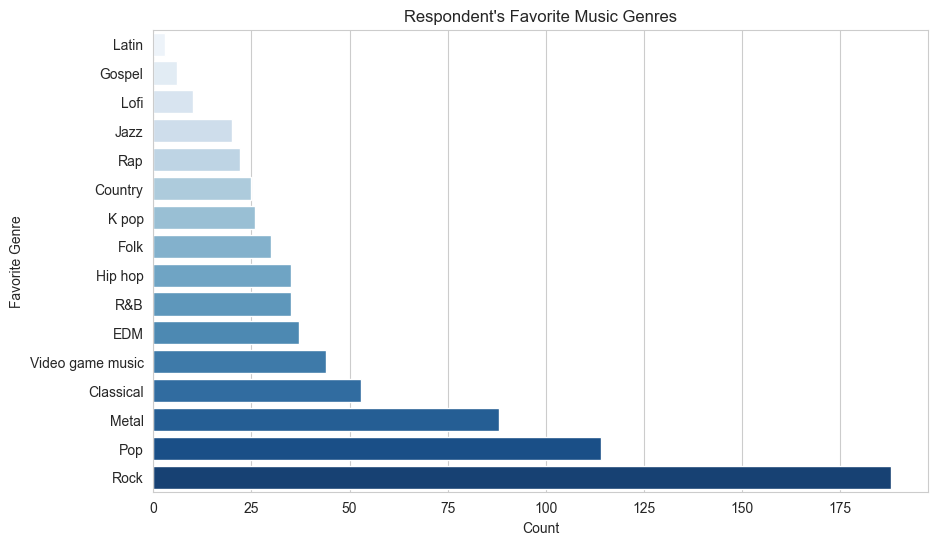

In [3]:
# Distribution of Favorite Genre

fav_genre_df = (data_raw.groupby("Fav genre")
                      .agg(count = ('Fav genre','count')).sort_values(by='count', ascending=True))
fav_genre_df.reset_index(inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genre_df['count'], y=fav_genre_df['Fav genre'], palette="Blues")
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Respondent\'s Favorite Music Genres')
plt.show()

In [4]:
# Distribution of Musical Genre Frequency Listening
val_count_dict = {}

cols = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 'Frequency [Video game music]']
col_label = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip Hop', 'Jazz', 'K Pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video Game Music']
value_order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

for val in cols:
    count = data_raw[val].value_counts()
    val_count_dict[val] = count

count_df = pd.concat(val_count_dict, axis=1)
count_df.columns = col_label
count_df = count_df.reindex(value_order)
final_count = count_df.transpose()

In [5]:
final_count

,Never,Rarely,Sometimes,Very frequently
Classical,169,259,200,108
Country,343,233,111,49
EDM,307,194,146,89
Folk,292,221,145,78
Gospel,535,135,52,14
Hip Hop,181,214,218,123
Jazz,261,247,175,53
K Pop,416,176,67,77
Latin,443,172,88,33
Lofi,280,211,160,85


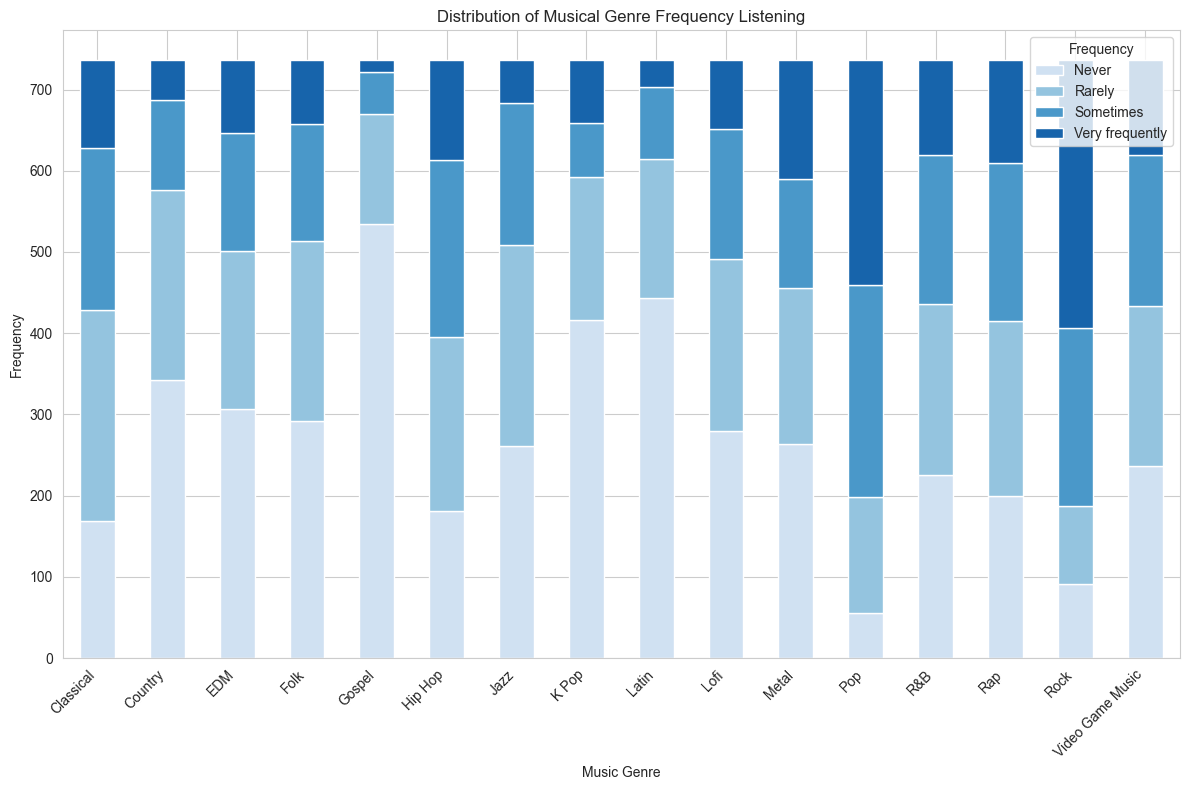

In [11]:
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(value_order)))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

final_count.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_xlabel('Music Genre')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Musical Genre Frequency Listening')
ax.legend(title='Frequency')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Importing Data
anxiety_data = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/anxiety_final_full.csv')
depression_data = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/depression_final_full.csv')
ocd_data = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/ocd_final_full.csv')
insomnia_data = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/Final Data/insomnia_final_full.csv')

In [27]:
# Anxiety
anxiety_labels = {0: 'Asymptomatic', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
anxiety_data['Anxiety'] = anxiety_data['Anxiety'].map(anxiety_labels)

anxiety_counts = anxiety_data['Anxiety'].value_counts().sort_index()

# Depression
depression_labels = {0: 'Asymptomatic', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
depression_data['Depression'] = depression_data['Depression'].map(depression_labels)

depression_counts = depression_data['Depression'].value_counts().sort_index()

# OCD
ocd_labels = {0: 'Asymptomatic', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
ocd_data['OCD'] = ocd_data['OCD'].map(ocd_labels)

ocd_counts = ocd_data['OCD'].value_counts().sort_index()

# Insomnia
insomnia_labels = {0: 'Asymptomatic', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
insomnia_data['Insomnia'] = insomnia_data['Insomnia'].map(insomnia_labels)

insomnia_counts = insomnia_data['Insomnia'].value_counts().sort_index()

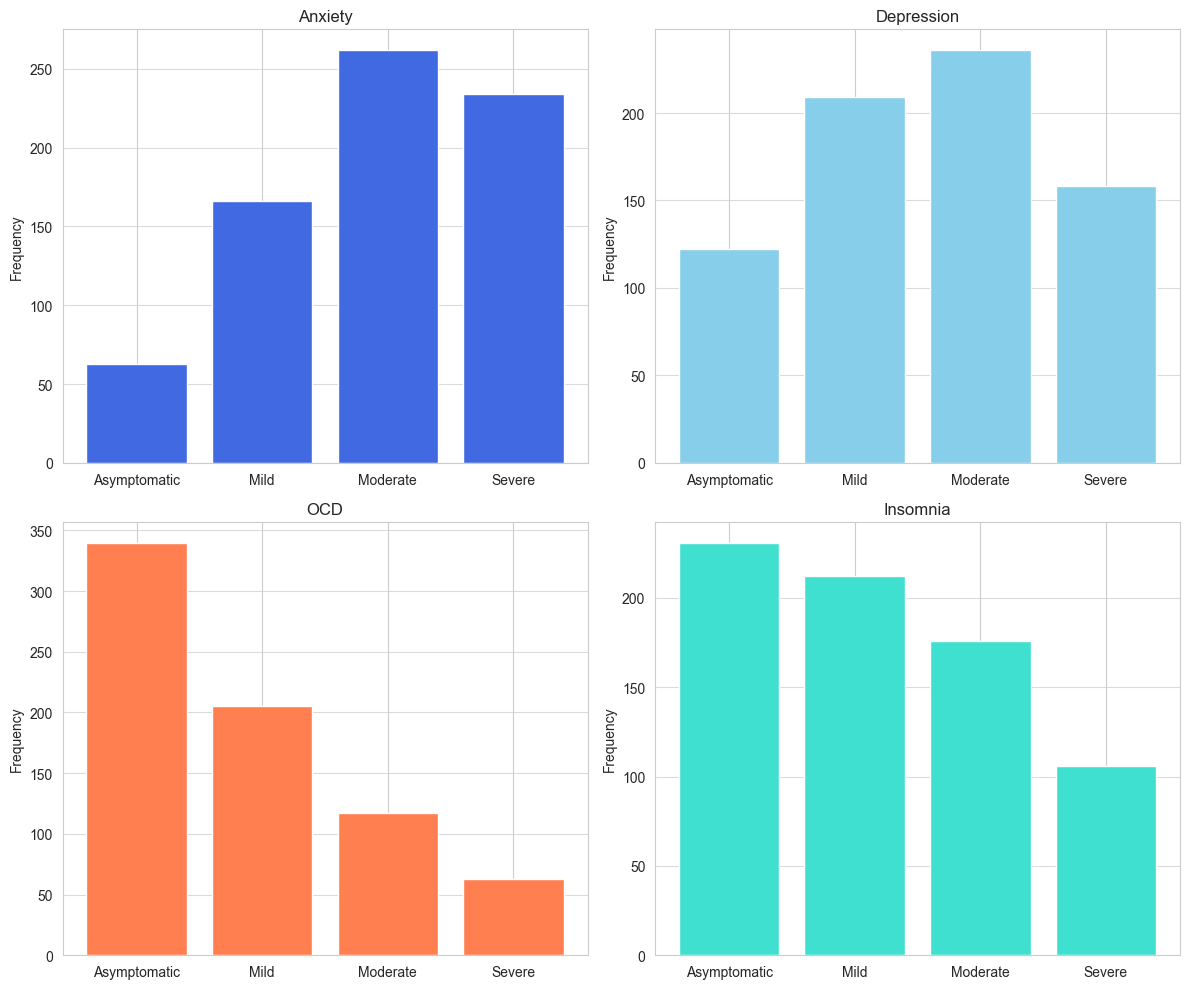

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting anxiety distribution
axs[0, 0].bar(anxiety_counts.index, anxiety_counts.values, color='royalblue')
axs[0, 0].set_title('Anxiety')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(axis='y', alpha=0.7)

# Plotting depression distribution
axs[0, 1].bar(depression_counts.index, depression_counts.values, color='skyblue')
axs[0, 1].set_title('Depression')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(axis='y', alpha=0.7)

# Plotting OCD distribution
axs[1, 0].bar(ocd_counts.index, ocd_counts.values, color='coral')
axs[1, 0].set_title('OCD')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(axis='y', alpha=0.7)

# Plotting insomnia distribution
axs[1, 1].bar(insomnia_counts.index, insomnia_counts.values, color='turquoise')
axs[1, 1].set_title('Insomnia')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()